In [ ]:
import cv2
import keras
import numpy as np
import pandas as pd
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, ZeroPadding2D, BatchNormalization

In [ ]:
x = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta64allx.npy')/255.0
y = np.load('/content/drive/My Drive/LICT training/Mosfiqun Nahid Hassan/Preprocessing_Data( Jupyter)/numta64ally.npy')

In [ ]:
x.shape

(72045, 64, 64)

In [ ]:
x = x.reshape(-1,64,64,1)
y = to_categorical(y)

In [ ]:
x.shape

(72045, 64, 64, 1)

In [ ]:
y.shape

(72045, 10)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3),padding='same', activation='relu', input_shape=(64, 64,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 512)        

In [ ]:
history = model.fit(x, y, validation_split=0.1, epochs=15, batch_size=250)

Train on 64840 samples, validate on 7205 samples
Epoch 1/15
64840/64840 [==============================] - 60s 924us/step - loss: 0.6645 - accuracy: 0.7604 - val_loss: 0.1227 - val_accuracy: 0.9609
Epoch 2/15
64840/64840 [==============================] - 50s 769us/step - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.1360 - val_accuracy: 0.9627
Epoch 3/15
64840/64840 [==============================] - 50s 768us/step - loss: 0.0487 - accuracy: 0.9857 - val_loss: 0.0969 - val_accuracy: 0.9732
Epoch 4/15
64840/64840 [==============================] - 50s 771us/step - loss: 0.0333 - accuracy: 0.9895 - val_loss: 0.1268 - val_accuracy: 0.9646
Epoch 5/15
64840/64840 [==============================] - 50s 770us/step - loss: 0.0267 - accuracy: 0.9914 - val_loss: 0.1135 - val_accuracy: 0.9747
Epoch 6/15
64840/64840 [==============================] - 50s 770us/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.1449 - val_accuracy: 0.9711
Epoch 7/15
64840/64840 [==============================] -

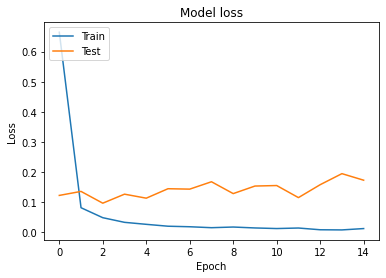

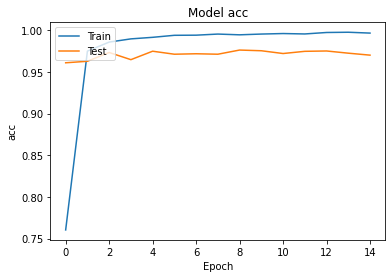

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.save_weights('VGG16_val_accuracy_97.h5')

In [ ]:
model.save('VGG16_Model.h5')

In [ ]:
all_img = []
for i in range(1,10):
  img1 = cv2.imread(str(i)+'.PNG',0)
  (thresh, im_bw) = cv2.threshold(img1, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  inv = cv2.bitwise_not(im_bw)
  all_img.append(cv2.resize(inv, (64,64)))

In [ ]:
all_img = np.array(all_img)

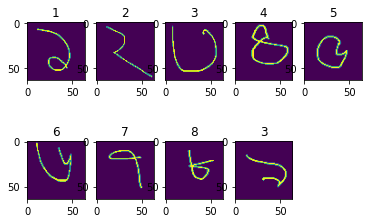

In [ ]:
for i in range(1,10):
  plt.subplot(2,5,i)
  plt.imshow(all_img[i-1])
  plt.title(np.argmax(model.predict(np.reshape(all_img[i-1],(-1,64,64,1)))))